In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install bertopic

## Topic Modelling

#### This notebook loads processed rap data lyrics. We apply topic modelling techniques with BERT for different time periods. By analysing these sentiments over time we aim to answer the questions regarding the Evolution of rap lyrics, and whether the themes have changed for the better or worse.

In [1]:
import pandas as pd

merged_df = pd.read_csv('/kaggle/input/lyrics-mergedall/merged_all.csv')
merged_df.head()

/tmp/ipykernel_33/2407017261.py:3: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('/kaggle/input/lyrics-mergedall/merged_all.csv')


,Unnamed: 0,artist,song,lyric,next lyric,categories,bio_yearsactivestart,bio_birthdate,bio_summary,bio_yearsactiveend,bio_deathdate,standardized_name,City,State,Country,US_State,Region,release_date,release_datetime,title
0,0,fetty wap,trap queen,rgf productions,remy boyz yahah,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,NaN,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen
1,0,fetty wap,trap queen,remy boyz yahah,1738 ayy,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,NaN,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen
2,0,fetty wap,trap queen,1738 ayy,im like hey whats up hello,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,NaN,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen
3,0,fetty wap,trap queen,im like hey whats up hello,seen yo pretty ass soon as you came in the door,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,NaN,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen
4,0,fetty wap,trap queen,seen yo pretty ass soon as you came in the door,i just wanna chill got a sack for us to roll,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,NaN,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen


In [3]:
coref1 = pd.read_excel('/kaggle/input/coreflyricsfix/coref.xlsx')
coref2 = pd.read_csv('/kaggle/input/coreflyricsfix/coref_df_second_part.csv')
# Concatenate the two DataFrames

coref1.drop(columns=['Column1'],axis=1,inplace=True)
coref1.head()

coref2.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
coref2.head()

coref_df = pd.concat([coref1,coref2], ignore_index=True)
coref_df.head()


,lyric,resolved_lyric
0,rgf productions,rgf productions
1,remy boyz yahah,remy boyz yahah
2,1738 ayy,1738 ayy
3,im like hey whats up hello,im like hey whats up hello
4,seen yo pretty ass soon as you came in the door,seen yo pretty ass soon as you came in the door


In [4]:
merged_df2 = pd.merge(merged_df,coref_df,on='lyric',how='left')
merged_df2.head()

,Unnamed: 0,artist,song,lyric,next lyric,categories,bio_yearsactivestart,bio_birthdate,bio_summary,bio_yearsactiveend,...,standardized_name,City,State,Country,US_State,Region,release_date,release_datetime,title,resolved_lyric
0,0,fetty wap,trap queen,rgf productions,remy boyz yahah,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,...,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen,rgf productions
1,0,fetty wap,trap queen,remy boyz yahah,1738 ayy,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,...,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen,remy boyz yahah
2,0,fetty wap,trap queen,1738 ayy,im like hey whats up hello,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,...,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen,1738 ayy
3,0,fetty wap,trap queen,im like hey whats up hello,seen yo pretty ass soon as you came in the door,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,...,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen,im like hey whats up hello
4,0,fetty wap,trap queen,seen yo pretty ass soon as you came in the door,i just wanna chill got a sack for us to roll,['rapper'],2014.0,1991-06-07,"Willie Maxwell II (born June 7, 1991), better ...",NaN,...,fetty wap,Paterson,"Paterson, Passaic County, New Jersey, United S...",United States,New Jersey,East,"{'year': 2014, 'month': 3, 'day': 8}",2014-03-08,trap queen,seen yo pretty ass soon as you came in the door


In [ ]:
# merged_df2.to_csv('merged_plus_decade_and_coref.csv')
# coref_df.to_csv('full_coref.csv')

# !zip merged_plus_decade_and_coref.zip /kaggle/working/merged_plus_decade_and_coref.csv
# !zip full_coref.zip /kaggle/working/full_coref.csv

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### Topic Modelling - Over time

In [6]:
# Calculate the decade
decade_df = merged_df2.copy()
decade_df['release_datetime'] = pd.to_datetime(decade_df['release_datetime'])
decade_df['decade'] = (decade_df['release_datetime'].dt.year // 10) * 10
decade_df = decade_df.dropna(subset=['decade'])

In [7]:
# there are 30k entries PER decade, should be more than enough?
decade_df.decade.value_counts()

decade
2010.0    462510
2000.0    165169
1990.0    150725
2020.0     67383
1980.0     31228
Name: count, dtype: int64

In [71]:
#decade_df.drop_duplicates(subset='resolved_lyric', inplace=True)

In [8]:
# make sure all string to avoid errros when using Bertopic
decade_df['resolved_lyric'] = decade_df['resolved_lyric'].apply(str) 
decade_df['decade'] = decade_df['decade'].apply(int) 
# get lists grouped by decade (input for Bertopic) 
decade_df.sort_values(by='decade', inplace=True,ascending=True)

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

lyric_data_by_decade = resampled_decade_df.groupby('decade')['resolved_lyric'].apply(list).to_dict()

# PER DECADE
# finding optimal number of topics

vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model,nr_topics=5)
topic_num = 10 # not used for now
topic_model_per_decade = {
    1980:None
    ,1990:None
    ,2000:None
    ,2010:None
    ,2020:None
}

for decade, lyrics in lyric_data_by_decade.items():
    model = BERTopic(vectorizer_model=vectorizer_model)
    # Move BERTopic model to appropriate device
    topics, probs = model.fit_transform(lyrics)

    print(f"Optimal topics for {decade}: {len(topics)}")
    
    
    model.save((f"TopicModel{decade}"), serialization="safetensors")
    
    topic_model_per_decade[decade] = model

### Topic Modelling - Regions

In [84]:
merged_df2.Region.value_counts()

Region
East       453240
South      259797
Other      240477
West       155780
Midwest    152732
Name: count, dtype: int64

In [110]:
# get lists grouped by decade (input for Bertopic) 
region_df = merged_df2.dropna(subset=['Region'])
region_df['resolved_lyric'] = region_df['resolved_lyric'].apply(str)
region_df.sort_values(by='Region', inplace=True, ascending=True)
region_df.drop_duplicates(subset='resolved_lyric', inplace=True)
lyric_data_by_region = region_df.groupby('Region')['resolved_lyric'].apply(list).to_dict()

## Dynamic Topic Modelling

In [9]:
#do resampling to not skew having too many topics in one decade
decade_df['decade'].value_counts()

decade
2010    462510
2000    165169
1990    150725
2020     67383
1980     31228
Name: count, dtype: int64

In [10]:
import pandas as pd

number_of_samples = 100000

grouped = decade_df.groupby('decade')

resampled_decade_df = pd.DataFrame(columns=decade_df.columns)

for name, group in grouped:
    if len(group) < number_of_samples:
        upsampled_group = group.sample(n=number_of_samples, replace=True)
        resampled_decade_df = pd.concat([resampled_decade_df, upsampled_group], ignore_index=True)
    elif len(group) > number_of_samples:
        downsampled_group = group.sample(n=number_of_samples, replace=False)
        resampled_decade_df = pd.concat([resampled_decade_df, downsampled_group], ignore_index=True)
    else:
        resampled_decade_df = pd.concat([resampled_decade_df, group], ignore_index=True)

resampled_decade_df.head()
# resampled_decade_df.to_csv('resampled_decade_tp.csv', index=False)


/tmp/ipykernel_33/3962746387.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resampled_decade_df = pd.concat([resampled_decade_df, upsampled_group], ignore_index=True)


,Unnamed: 0,artist,song,lyric,next lyric,categories,bio_yearsactivestart,bio_birthdate,bio_summary,bio_yearsactiveend,...,City,State,Country,US_State,Region,release_date,release_datetime,title,resolved_lyric,decade
0,12013,mc lyte,not wit’ a dealer,miss c said,girl youre stupid youre gonna take a fall,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,"Brooklyn, Kings County, City of New York, New ...",United States,New York,East,"{'year': 1989, 'month': 10, 'day': 3}",1989-10-03,not wit’ a dealer,miss c said,1980
1,12091,n.w.a,parental discretion iz advised,a photo or fresh with the flair for fashion,pure simplicity see its elementary,['group'],NaN,NaN,N.W.A (an abbreviation for Niggaz Wit Attitude...,NaN,...,Los Angeles,"Los Angeles, Los Angeles County, California, U...",United States,California,West,"{'year': 1988, 'month': 8, 'day': 8}",1988-08-08,parental discretion iz advised,a photo or fresh with the flair for fashion,1980
2,7195,insane clown posse,freaky tales,met an amish girl named maryanne,she liked my meat no vegetarian,NaN,NaN,NaN,NaN,NaN,...,NaN,"None, Torino, Piemonte, Italia",Italia,NaN,Other,"{'year': 1987, 'month': 7, 'day': 20}",1987-07-20,freaky tales,met an amish girl named maryanne,1980
3,2115,royce da 5'9'',dope man,dopedopedope man,old head starin at me they some hasbeens im th...,['rapper'],1995.0,1977-07-05,"Ryan Daniel Montgomery (born July 5, 1977), be...",NaN,...,Detroit,"Detroit, Wayne County, Michigan, United States",United States,Michigan,Midwest,"{'year': 1987, 'month': 8, 'day': 13}",1987-08-13,dope man,dopedopedope man,1980
4,14002,ll cool j,rock the bells,you bring the wood pecker ill bring the wood,the bells are whippin and rippin at your body ...,['rapper'],NaN,NaN,"James Todd Smith (born January 14, 1968), know...",NaN,...,Hollis,"Hollis, Kern County, California, 93250, United...",United States,New Hampshire,East,"{'year': 1985, 'month': 11, 'day': 18}",1985-11-18,rock the bells,you bring the wood pecker ill bring the wood,1980


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

timestamps = resampled_decade_df['release_datetime'].tolist()
lyrics = resampled_decade_df['resolved_lyric'].tolist()

vectorizer_model = CountVectorizer(stop_words="english")

model = BERTopic(vectorizer_model=vectorizer_model)
topics, probs = model.fit_transform(lyrics)

In [32]:
# topic_model = BERTopic(verbose=True)
# topics, probs = topic_model.fit_transform(tweets)
model.save((f"TopicModelAllLyrics_Sampled100k"), serialization="safetensors")

In [159]:
model.reduce_topics(lyrics, nr_topics=20)

In [160]:
topics_over_time = model.topics_over_time(lyrics, timestamps, nr_bins=50)

In [163]:
topics_over_time = topics_over_time.loc[topics_over_time['Name']!='7_ich_und_que_du'] 
topics_over_time = topics_over_time.loc[topics_over_time['Name']!='0_im_like_dont_yeah'] 

In [ ]:
model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(words_list,topic_nr, max_words=None):
    # Join the words into a single string
    text = ' '.join(words_list)
    
    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=max_words).generate(text)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.title(f'Topic {topic_nr} visualization')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

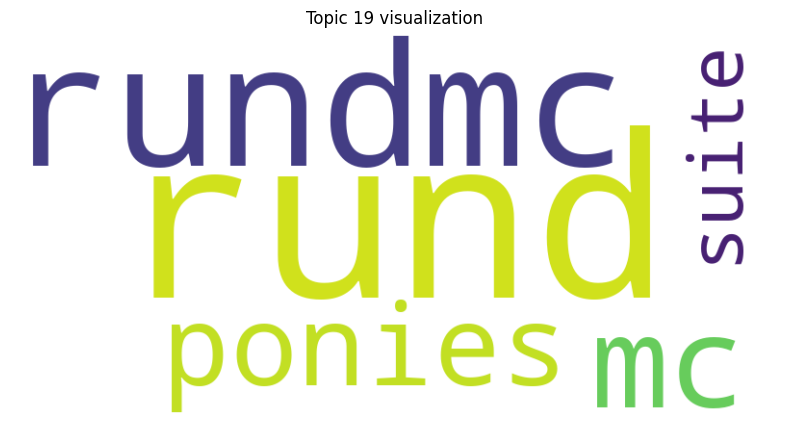

In [158]:
topic_nr = 19

words_list = topics_over_time.loc[topics_over_time['Topic'] == topic_nr]['Words'].tolist()
#words_list = ['rundmc','og','mc','ponies','enemy']
plot_wordcloud(words_list,topic_nr, max_words=5)
model.visualize_topics_over_time(topics_over_time, topics=[topic_nr])

In [ ]:
topic_nrs = topics_over_time['Topic'].unique()
for topic_num in topic_nrs:
    words_list = topics_over_time.loc[topics_over_time['Topic'] == topic_num]['Words'].tolist()
    plot_wordcloud(words_list,topic_num, max_words=5)

### Topic Modelling Over Time - Using Seed Words and Min # of Topics

In [ ]:
rap_words = [
    "money", "cash", "wealth", "bling", "benjamins", "dough", "paper", # general rap words
    "jewelry", "ice", "chains", "grillz", "wrist", "watch", 
    "god", "faith", "pray", "blessings", "heaven", "saint",
    "cars", "whips", "rides", "vehicles", "beamer", "benz", "lambo",
    "jail", "prison", "penitentiary", "cell", "bars", "lockdown",
    "streets", "hood", "block", "ghetto", "projects", "alley", "corner",
    "hustle", "grind", "work", "ambition", "entrepreneur", "hustler",
    "struggle", "hardship", "adversity", "pain", "battle", "fight",
    "dreams", "aspirations", "visions", "goals", "success", "achievement",
    "power", "control", "influence", "dominance", "authority", "rule",
    "respect", "admiration", "honor", "loyalty", "reputation", "dignity",
    "love", "romance", "passion", "relationship", "heart", "soul",
    "hate", "anger", "enmity", "jealousy", "rivalry", "resentment",
    "family", "kin", "relatives", "blood", "clan", "tribe",
    "legacy", "heritage", "inheritance", "tradition", "lineage", "ancestry",
    "strive", "effort", "endeavor", "push", "drive", "pursuit",
    "grit", "toughness", "resilience", "determination", "endurance", "perseverance",
    "real", "authentic", "genuine", "true", "honest", "sincere",
    "trap", "hustle", "grind", "struggle", "hustle", "hustler",
    "gang", "crew", "posse", "squad", "mob", "clique",
    "strap", "heat", "weapon", "gun", "piece", "firearm",
    "flow", "rhyme", "verse", "lyric", "delivery", "cadence",
    "equality", "justice", "oppression", "racism", "discrimination", # adding some social issues wrods as well
    "inequality", "protest", "activism", "revolution", "freedom", 
    "strife", "poverty", "violence", "crime", "corruption", 
    "system", "government", "authority", "society", "community", 
    "injustice", "prejudice", "stereotype", "stigma", "minority", 
    "privilege", "marginalized", "disadvantaged", "empowerment", 
    "solidarity", "unity", "change", "progress", "awareness", 
    "education", "youth", "future", "hope", "resistance",
    "drugs", "weed", "marijuana", "cannabis", "pot",  # drug-related words
    "herb", "joint", "blunt", "ganja", "reefer", 
    "dope", "cocaine", "crack", "heroin", "meth", 
    "ecstasy", "MDMA", "LSD", "acid", "shrooms", 
    "speed", "amphetamine", "Xanax", "OxyContin", "percocet", 
    "lean", "syrup", "codeine", "opioid", "narcotic", 
    "trip", "high", "buzz", "euphoria", "addiction", 
    "rehab", "recovery", "overdose", "deal", "supplier", 
    "dealer", "trap house", "stash", "bag", "package",
        "city", "town", "neighborhood", "block", "borough",  # region/where from
    "hood", "ghetto", "projects", "streets", "avenue", 
    "alley", "corner", "suburb", "downtown", "metropolis", 
    "urban", "rural", "country", "county", "state", 
    "region", "coast", "east", "west", "north", 
    "south", "midwest", "dirty south", "west coast", "east coast", 
    "gulf coast", "bay area", "chi-town", "big apple", "la", 
    "atl", "nyc", "mia", "h-town", "dmv", 
    "cali", "texas", "brooklyn", "compton", "detroit", 
    "queens", "atlanta", "miami", "chicago", "new orleans", 
    "houston", "dc", "oakland", "philadelphia", "memphis"
]
rap_words = [word.lower() for word in rap_words]

In [25]:
from umap import UMAP
from datasets import load_dataset
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer



lyrics = resampled_decade_df['resolved_lyric'].tolist()
timestamps = resampled_decade_df['release_datetime'].tolist()
len(timestamps)

500000

In [21]:
# For illustration purposes, we make sure the output is fixed when running this code multiple times
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)


# We can choose any number of seed words for which we want their representation
# to be strengthen. We increase the importance of these words as we want them to be more
# likely to end up in the topic representations.
ctfidf_model = ClassTfidfTransformer(
    seed_words=rap_words, 
    seed_multiplier=4
)

# We run the topic model with the seeded words
time_model_seeds = BERTopic(
    umap_model=umap_model,
    min_topic_size=15,
    ctfidf_model=ctfidf_model,
).fit(lyrics)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [22]:

time_model_seeds.save((f"TopicModelAllLyrics_Time_SeedsSampled100k"), serialization="safetensors")

In [23]:
time_model_seeds.reduce_topics(lyrics,nr_topics=50)

In [26]:
topics_over_time_seeded = time_model_seeds.topics_over_time(lyrics, timestamps, nr_bins=50)

In [30]:
time_model_seeds.visualize_topics_over_time(topics_over_time_seeded, top_n_topics=20)

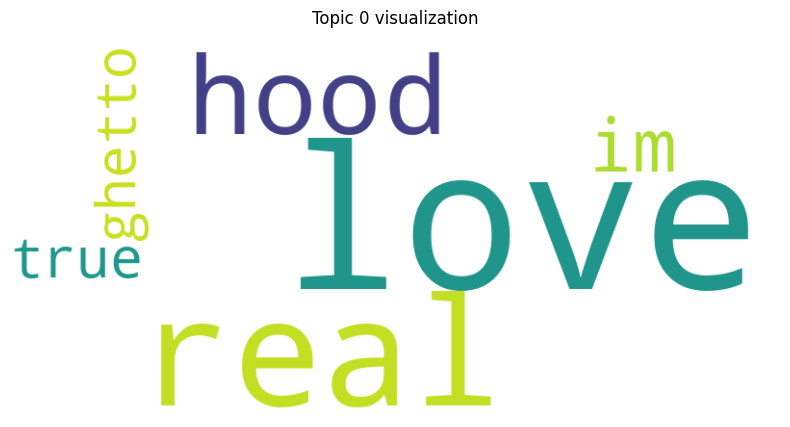

In [63]:
import random
topic_nr = 0
words_list = topics_over_time_seeded.loc[topics_over_time_seeded['Topic'] == topic_nr]['Words'].tolist()
plot_wordcloud(words_list,topic_nr, max_words=6)

In [ ]:
idxs = []
for i,loop_topic_num in enumerate(time_model_seeds.topics_):
    if loop_topic_num == topic_nr:
        idxs.append(i)
        print(lyrics[i])
        if len(idxs) == 100: # can be a time sink
            break
lyric_subset = [l for i,l in enumerate(lyrics) if i in idxs]
#lyric_subset   
random.sample(lyric_subset, 100)

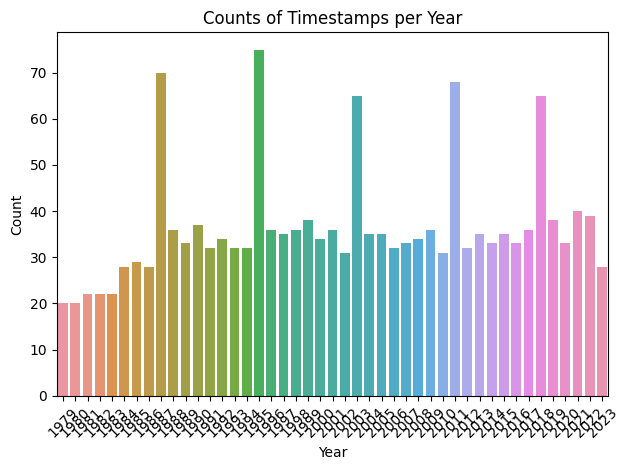

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Timestamp' is the column containing timestamps in topics_over_time_seeded
yearly_counts = topics_over_time_seeded['Timestamp'].dt.year.value_counts()

# Sort the index (years) in ascending order
yearly_counts_sorted = yearly_counts.sort_index()

sns.barplot(x=yearly_counts_sorted.index, y=yearly_counts_sorted.values)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Timestamps per Year')

# Customize x-axis ticks to show every 5th hour
plt.xticks(range(0, len(yearly_counts_sorted.index)), yearly_counts_sorted.index, rotation=45)

plt.tight_layout()
plt.show()

### Topic Modelling Per Region

In [7]:
merged_df2.Region.value_counts()

Region
East       453240
South      259797
Other      240477
West       155780
Midwest    152732
Name: count, dtype: int64

In [8]:
region_df = merged_df2.dropna(subset=['Region'])
region_df['resolved_lyric'] = region_df['resolved_lyric'].apply(str)

In [9]:
import pandas as pd

# Assuming 'merged_df2' and 'decade_df' are defined and 'decade' is already calculated in 'decade_df'
# Number of samples to upsample or downsample to
number_of_samples = 100000

# Group by 'decade'
grouped = region_df.groupby('Region')

# Initialize an empty DataFrame with the same columns as 'merged_df'
resampled_region_df = pd.DataFrame(columns=region_df.columns)

# Loop through each group (decade) and upsample or downsample to 100k samples
for name, group in grouped:
    if len(group) < number_of_samples:
        # Upsample: sample with replacement to reach number_of_samples
        upsampled_group = group.sample(n=number_of_samples, replace=True)
        resampled_region_df = pd.concat([resampled_region_df, upsampled_group], ignore_index=True)
    elif len(group) > number_of_samples:
        # Downsample: sample without replacement to reduce to number_of_samples
        downsampled_group = group.sample(n=number_of_samples, replace=False)
        resampled_region_df = pd.concat([resampled_region_df, downsampled_group], ignore_index=True)
    else:
        # If the group size is exactly number_of_samples, add it as is
        resampled_region_df = pd.concat([resampled_region_df, group], ignore_index=True)

# Display the first few rows of the resampled DataFrame
resampled_region_df.head()

# Optional: Save to CSV file
# resampled_decade_df.to_csv('resampled_decade_tp.csv', index=False)


/tmp/ipykernel_34/65120157.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resampled_region_df = pd.concat([resampled_region_df, downsampled_group], ignore_index=True)


,Unnamed: 0,artist,song,lyric,next lyric,categories,bio_yearsactivestart,bio_birthdate,bio_summary,bio_yearsactiveend,...,standardized_name,City,State,Country,US_State,Region,release_date,release_datetime,title,resolved_lyric
0,20581,a$ap rocky,get lit,young nigga from the southside of htown,fat tony up in this bitch fuckin with aap rock...,['rapper'],2007.0,1988-10-03,"Rakim Mayers (born October 3, 1988), better kn...",NaN,...,a$ap rocky,New York,"City of New York, New York, United States",United States,New York,East,"{'year': 2011, 'month': 10, 'day': 31}",2011-10-31,get lit,young nigga from the southside of htown
1,8281,jay-z,never change,plead the fifth when it comes to the fam,im like a dog i never speak but i understand,NaN,NaN,NaN,NaN,NaN,...,NaN,Brooklyn,"Brooklyn, Kings County, City of New York, New ...",United States,New York,East,"{'year': 2001, 'month': 9, 'day': 11}",2001-09-11,never change,plead the fifth when it comes to the fam
2,9799,tariq trotter,we could be good (united),listen all you gotta do,are you never home,NaN,NaN,NaN,NaN,NaN,...,NaN,Philadelphia,"Philadelphia, Philadelphia County, Pennsylvani...",United States,Pennsylvania,East,"{'year': 2020, 'month': 10, 'day': 16}",2020-10-16,we could be good (united),listen all you gotta do
3,19114,mos def,my favorite band,yes sir yes maam yes yall,no fear of time,['rapper'],1994.0,1973-12-11,Yasiin Bey (born Dante Terrell Smith; December...,NaN,...,mos def,New York,"City of New York, New York, United States",United States,New York,East,"{'year': 2022, 'month': 5, 'day': 3}",2022-05-03,my favorite band,yes sir yes maam yes yall
4,14716,rittz,fulla shit,maybe thats somewhat out of line but who am i ...,specially only lovin you and only fuckin you s...,NaN,NaN,NaN,NaN,NaN,...,NaN,Waynesburg,"Waynesburg, Greene County, Pennsylvania, Unite...",United States,Pennsylvania,East,"{'year': 2011, 'month': 3, 'day': 8}",2011-03-08,fulla shit,maybe thats somewhat out of line but who am i ...


In [10]:
resampled_region_df.Region.value_counts()

Region
East       100000
Midwest    100000
Other      100000
South      100000
West       100000
Name: count, dtype: int64

In [11]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

# finding optimal number of topics
classes = resampled_region_df['Region'].tolist()
lyrics = resampled_region_df['resolved_lyric'].tolist()

vectorizer_model = CountVectorizer(stop_words="english")

region_model = BERTopic(vectorizer_model=vectorizer_model)
topics, probs = region_model.fit_transform(lyrics)

2024-05-25 13:48:50.481632: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 13:48:50.481738: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 13:48:50.658007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [12]:
# topic_model = BERTopic(verbose=True)
# topics, probs = topic_model.fit_transform(tweets)
region_model.save((f"TopicModelAllLyrics_Region_Sampled100k"), serialization="safetensors")

In [23]:
region_model.reduce_topics(lyrics, nr_topics=50)

In [24]:
topics_per_class = region_model.topics_per_class(lyrics, classes=classes)

In [26]:
region_model.visualize_topics_per_class(topics_per_class, top_n_topics=20)

In [ ]:
topic_nrs = topics_per_class['Topic'].unique()
for topic_num in topic_nrs:
    words_list = topics_per_class.loc[topics_per_class['Topic'] == topic_num]['Words'].tolist()
    plot_wordcloud(words_list,topic_num, max_words=5)

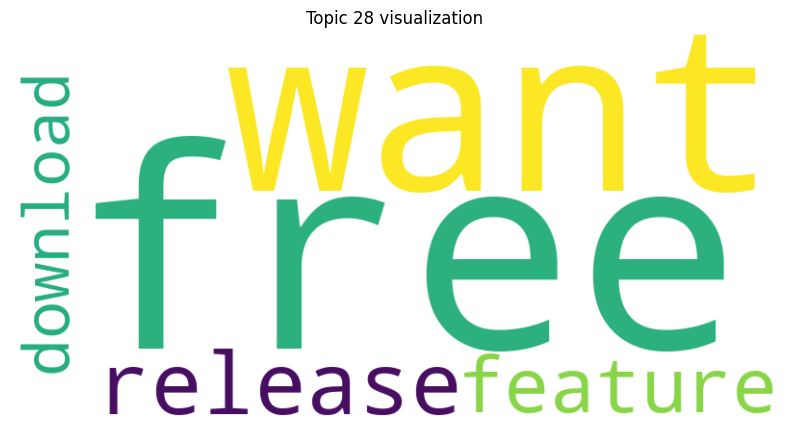

In [52]:
topic_nr = 28

words_list = topics_per_class.loc[topics_per_class['Topic'] == topic_nr]['Words'].tolist()
#words_list = ['rundmc','og','mc','ponies','enemy']
plot_wordcloud(words_list,topic_nr, max_words=5)
region_model.visualize_topics_per_class(topics_per_class, topics=[topic_nr])

### Topic Modelling Per Region - Using Seed Words and Min # per topic

In [ ]:
from umap import UMAP
from datasets import load_dataset
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

# For illustration purposes, we make sure the output is fixed when running this code multiple times
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

# We can choose any number of seed words for which we want their representation
# to be strengthen. We increase the importance of these words as we want them to be more
# likely to end up in the topic representations.
ctfidf_model = ClassTfidfTransformer(
    seed_words=rap_words, 
    seed_multiplier=4
)

# We run the topic model with the seeded words
region_model_seeds = BERTopic(
    umap_model=umap_model,
    min_topic_size=15,
    ctfidf_model=ctfidf_model,
).fit(lyrics)




In [60]:
# topic_model = BERTopic(verbose=True)
# topics, probs = topic_model.fit_transform(tweets)
region_model_seeds.save((f"TopicModelRegion_SeedsSampled"), serialization="safetensors")

In [73]:
region_model_seeds.reduce_topics(lyrics,nr_topics=50)

In [75]:
topics_per_class_seeded = region_model_seeds.topics_per_class(lyrics, classes=classes)

In [ ]:
region_model_seeds.visualize_topics_per_class(topics_per_class_seeded, topic_num= 20)

In [147]:

keyword = "money"

relevant_topics = region_model_seeds.find_topics(keyword)[0]

region_model_seeds.visualize_topics_per_class(topics_per_class_seeded, top_n_topics=50)

In [ ]:
region_model_seeds.merge_topics(lyrics,topics_to_merge=[])

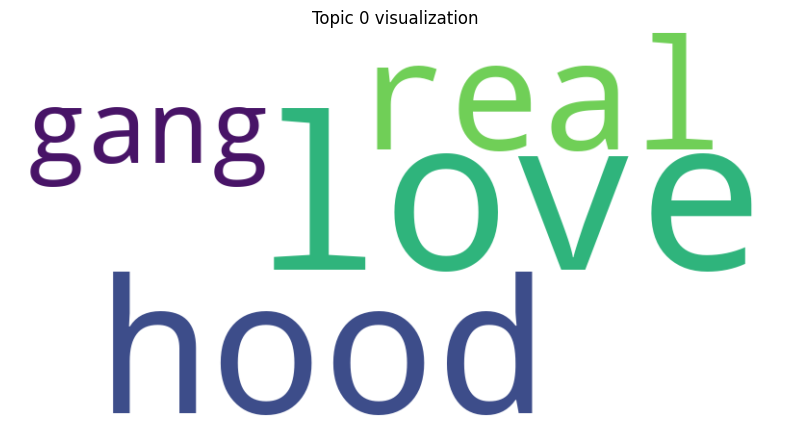

In [148]:
topic_nr = 0
words_list = topics_per_class_seeded.loc[topics_per_class_seeded['Topic'] == topic_nr]['Words'].tolist()
#words_list = ['rundmc','og','mc','ponies','enemy']
plot_wordcloud(words_list,topic_nr, max_words=5)

